In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
file_name = "result.csv"
file_name_200 = "result_200.csv"

In [20]:
# Load CSV file as pandas DataFrame
df1 = pd.read_csv(file_name)
df_200 = pd.read_csv(file_name_200)
frames = [df1, df_200]
df = pd.concat(frames)

In [21]:
df

,FD graph,TPR Sensitivity,TNR Specificity,PPV Precision,NPV Negative Precision
0,../../../jpg_file/Sparse/FR/n=500d=6_35995.jpg,0.685268,0.115385,0.869688,0.040816
1,../../../jpg_file/Sparse/KK/n=500d=6_29163.jpg,0.702765,0.272727,0.864023,0.122449
2,../../../jpg_file/Sparse/FA2/n=500d=6_32813.jpg,0.714912,0.386364,0.923513,0.115646
3,../../../jpg_file/Sparse/JIGGLE/n=500d=6_28183...,0.710870,0.350000,0.926346,0.095238
4,../../../jpg_file/Sparse/FR/n=1000d=6_9596.jpg,0.697259,0.285714,0.835714,0.153333
5,../../../jpg_file/Sparse/KK/n=1000d=6_5157.jpg,0.686603,0.231707,0.820000,0.126667
6,../../../jpg_file/Sparse/FA2/n=1000d=6_7470.jpg,0.698570,0.285714,0.907143,0.086667
7,../../../jpg_file/Sparse/JIGGLE/n=1000d=6_8449...,0.706383,0.400000,0.948571,0.080000
8,../../../jpg_file/Sparse/FR/n=2000d=6_2232.jpg,0.689528,0.275204,0.808908,0.166118
9,../../../jpg_file/Sparse/KK/n=2000d=6_1278.jpg,0.711586,0.328225,0.622126,0.422697


In [26]:
df_result = pd.DataFrame(columns=['Type', 'FD_Algorithm', 'Nodes_Number', 'Degree', 'TPR_Sensitivity', 'TNR_Specificity','PPV_Precision', 'NPV_Negative_Precision'])
for filename in df['FD graph']:
    new_name = filename.replace("../../../jpg_file/","")
    name_list = new_name.split('/')
    prop_list = name_list[2].split('=')
    node_number = prop_list[1].replace('d','')
    if "_" in prop_list[2]:
        degree = prop_list[2].split("_")[0]
    else:
        degree = prop_list[2].replace(".jpg","")
    tpr = df.loc[df['FD graph'] == filename, 'TPR Sensitivity'].values[0]
    tnr = df.loc[df['FD graph'] == filename, 'TNR Specificity'].values[0]
    ppv = df.loc[df['FD graph'] == filename, 'PPV Precision'].values[0]
    npv = df.loc[df['FD graph'] == filename, 'NPV Negative Precision'].values[0]
    df_result.loc[len(df_result.index)] = [name_list[0], name_list[1], node_number, degree, tpr, tnr, ppv, npv]



In [27]:
df_result

,Type,FD_Algorithm,Nodes_Number,Degree,TPR_Sensitivity,TNR_Specificity,PPV_Precision,NPV_Negative_Precision
0,Sparse,FR,500,6,0.685268,0.115385,0.869688,0.040816
1,Sparse,KK,500,6,0.702765,0.272727,0.864023,0.122449
2,Sparse,FA2,500,6,0.714912,0.386364,0.923513,0.115646
3,Sparse,JIGGLE,500,6,0.710870,0.350000,0.926346,0.095238
4,Sparse,FR,1000,6,0.697259,0.285714,0.835714,0.153333
5,Sparse,KK,1000,6,0.686603,0.231707,0.820000,0.126667
6,Sparse,FA2,1000,6,0.698570,0.285714,0.907143,0.086667
7,Sparse,JIGGLE,1000,6,0.706383,0.400000,0.948571,0.080000
8,Sparse,FR,2000,6,0.689528,0.275204,0.808908,0.166118
9,Sparse,KK,2000,6,0.711586,0.328225,0.622126,0.422697


In [28]:
def drawSensitivityGraphWithSameDegree(_type, _degree, df_result):
    temp = df_result.loc\
            [(df_result['Degree'] == str(_degree)), \
             ['Type', 'FD_Algorithm', 'Nodes_Number', 'TPR_Sensitivity']]
    print(temp)
    nodes_number_list = [200, 500, 1000, 2000, 3000]
    fr_list = []
    fa2_list = []
    kk_list = []
    jiggle_list = []
    for num in nodes_number_list:
        fr_list.append(temp.loc[(temp['Nodes_Number'] == str(num)) & (temp['Type'] == _type) & (temp['FD_Algorithm'] == 'FR'), 'TPR_Sensitivity'].values[0])
        fa2_list.append(temp.loc[(temp['Nodes_Number'] == str(num)) & (temp['Type'] == _type) & (temp['FD_Algorithm'] == 'FA2'), 'TPR_Sensitivity'].values[0])
        kk_list.append(temp.loc[(temp['Nodes_Number'] == str(num)) & (temp['Type'] == _type) & (temp['FD_Algorithm'] == 'KK'), 'TPR_Sensitivity'].values[0])
        jiggle_list.append(temp.loc[(temp['Nodes_Number'] == str(num)) & (temp['Type'] == _type) & (temp['FD_Algorithm'] == 'JIGGLE'), 'TPR_Sensitivity'].values[0])
        
    y1 = fr_list
    y2 = fa2_list
    y3 = kk_list
    y4 = jiggle_list
    # Plot the curves
    plt.plot(nodes_number_list, y1, label='FR')
    plt.plot(nodes_number_list, y2, label='FA2')
    plt.plot(nodes_number_list, y3, label='KK')
    plt.plot(nodes_number_list, y4, label='JIGGLE')
    # Add a title and legend
    plt.title('Type=' + _type + ' D=' + degree)
    plt.legend()
    fname = "Type="+_type+"_d="+str(degree)+"_Sensitivity.pdf"

    plt.savefig(os.path.join("graphs",fname),bbox_inches ="tight") 
    # Show the chart
    plt.show()

      Type FD_Algorithm Nodes_Number  TPR_Sensitivity
0   Sparse           FR          500         0.685268
1   Sparse           KK          500         0.702765
2   Sparse          FA2          500         0.714912
3   Sparse       JIGGLE          500         0.710870
4   Sparse           FR         1000         0.697259
5   Sparse           KK         1000         0.686603
6   Sparse          FA2         1000         0.698570
7   Sparse       JIGGLE         1000         0.706383
8   Sparse           FR         2000         0.689528
9   Sparse           KK         2000         0.711586
10  Sparse          FA2         2000         0.700668
11  Sparse       JIGGLE         2000         0.699380
12  Sparse           FR         3000         0.710029
13  Sparse           KK         3000         0.778049
14  Sparse          FA2         3000         0.722814
15  Sparse       JIGGLE         3000         0.721270
16  Sparse           FR          200         0.760417
17  Sparse           KK     

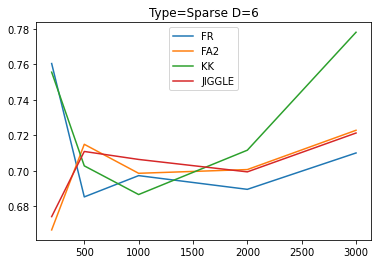

In [29]:
drawSensitivityGraphWithSameDegree('Sparse', 6, df_result)